<a href="https://colab.research.google.com/github/MohdSharik99/Regression-/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## Approach we will use to handle the given dataset
from the data description we are concluding that we have total 14 columns and our target column is 'Rented Bike Count' since this is going to be Supervised ML regression we will first understand the data such as data types, counts,values of each features, whether there are missing values or not and so on. Upon checking basic details of our data we will move to next section i.e Univariate analysis where we will perform distribution plots for each featuere and see what type of distribution each feature possess. These distributions will help us to understand which model we are going to choose for our data so that we can better results we will try to predict our target column based on explainable model/ models or model/model which are giving best prediction to out dataset. definetely we may come up with a lot of challenges.
 
So let's start working on this dataset.


## Section 1- Loading and reading the dataset
In this section we will import our required libraries which we will use throughout the project and then we will read some rows of dataset and will explore the datatype of each feature, null values in each column and how to treat these missing values,we will also check which feature has how many unique values so that we can decide how should we deal with each column (categorical, descrete, continueous or ordinal) and then we will describe the numeric columns.


In [1]:
# importing necessary libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler



In [2]:
# mounting the Drive to upload the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# loading the data
df = pd.read_csv('/content/drive/MyDrive/Alma better/SeoulBikeData.csv', encoding= 'unicode_escape' )

In [31]:
#  reading first 5 rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [32]:
# reading last 5 rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [33]:
# checking info of the given data such as datatype and no of non null values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [34]:
# checking all the columns 
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [35]:
# checking if any data is missing
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [36]:
# exploring the unique values in each column for this we will create two lists one referring column name and the other one is list of unique values
# unique values list
unique_values = []
for i in df.columns:
  x= df[i].nunique()
  unique_values.append(x)

  


In [37]:
# Creating a Dataframe of unique values with respect to the columns
unique_val_df = pd.DataFrame({'Columns_name': df.columns, 'unique_values': unique_values})
unique_val_df

,Columns_name,unique_values
0,Date,365
1,Rented Bike Count,2166
2,Hour,24
3,Temperature(°C),546
4,Humidity(%),90
5,Wind speed (m/s),65
6,Visibility (10m),1789
7,Dew point temperature(°C),556
8,Solar Radiation (MJ/m2),345
9,Rainfall(mm),61


In [38]:
# describing the data
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## Summary Section 1:
Since we already have mentioned that in section we are going to explore very basic information about the data hence we not going to deep dive into much details or really we do not have much to say at this point but yes there are some points as given below.
1. there are columns which has good amount of zeros such as rainfall and snowfall and this is help that Seoul is not a rainy or snowful place which truely is.
2. In our dataset there are no missing values all the features are already filled with values and therefore we can skip missing value treatement task.
3. from last code i.e describe we can say that we do not have outliers in our data and if there there are really outliers we will explore them in section 2.

## Section 2 - Univariate analysis
In this section of the project we deep dive into analysis of single feature hence calling it as Univariate analysis. then will explore distributions of features and try to understand which transformation should we apply and what is the reason behind it.  

## Univariate analysis

<Figure size 576x576 with 0 Axes>

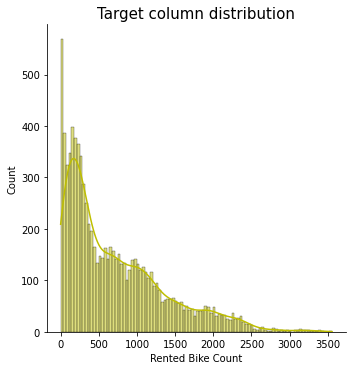

In [39]:
# Exploring target col,umn i.e Rented Bike Count
plt.figure(figsize = (8,8))
sns.displot((df['Rented Bike Count']), color = 'y', bins = 100, kde =True )
plt.title('Target column distribution', fontsize = 15)
plt.show()

<Figure size 648x432 with 0 Axes>

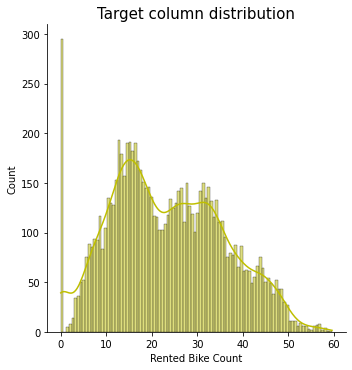

In [40]:
# Exploring target column after sqrt transformation i.e Rented Bike Count
plt.figure(figsize = (9,6))
sns.displot(np.sqrt(df['Rented Bike Count']), color = 'y', bins = 100, kde =True )
plt.title('Target column distribution', fontsize = 15)
plt.show()


In [41]:
# defining all the columns
features = df.columns
features 

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

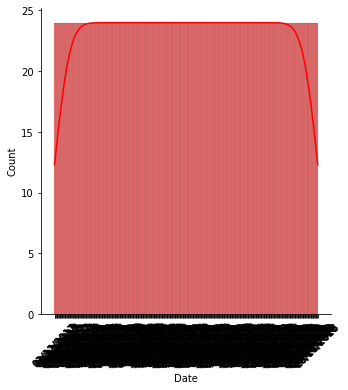

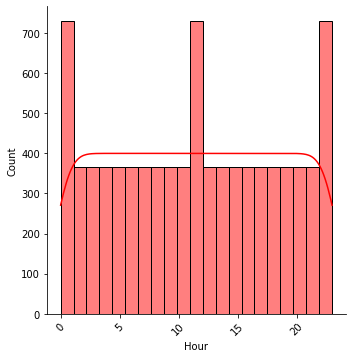

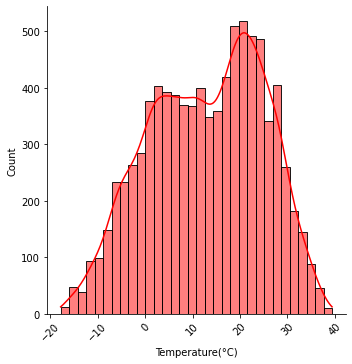

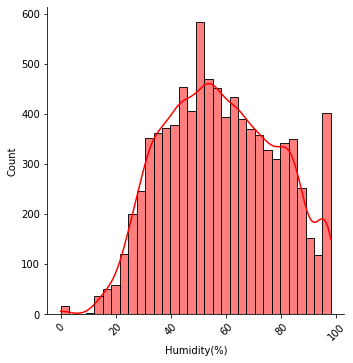

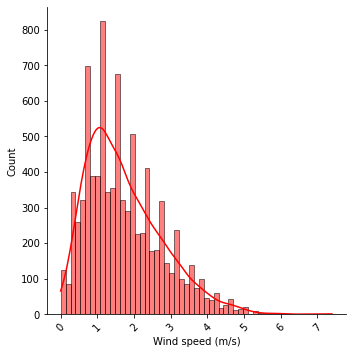

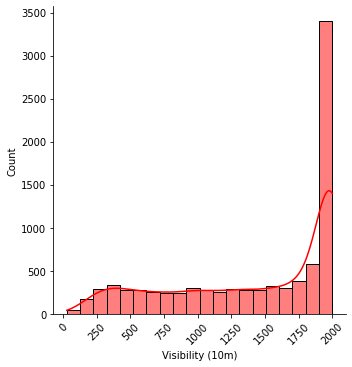

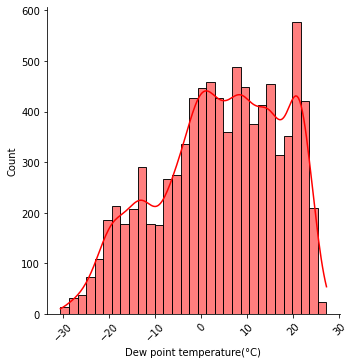

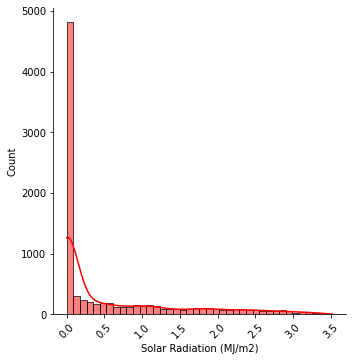

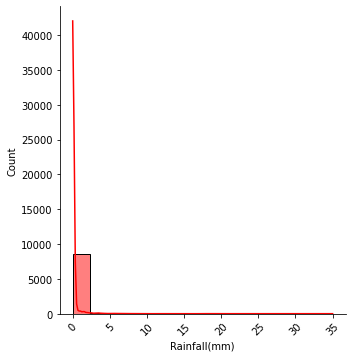

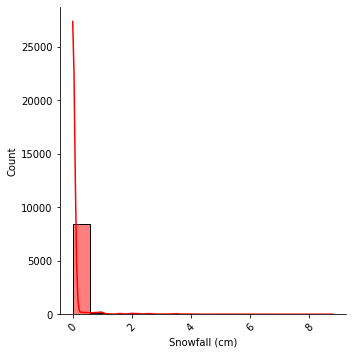

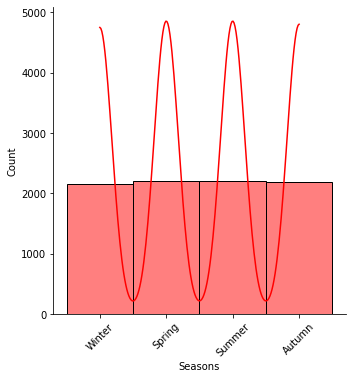

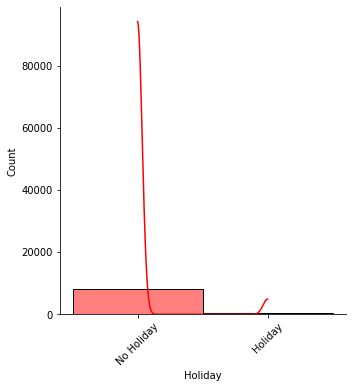

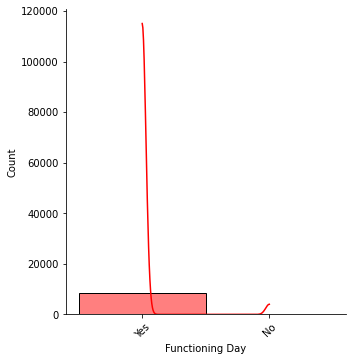

In [42]:
# ploting the distribution of the features in our dataset
for i in df.columns :
  if i != 'Rented Bike Count':

    sns.displot(df[i], color = 'r', kde = True )
    plt.xticks(rotation = 45)

## Section 2 Summary
In this Section we have explored distribtions of each feature of data set and have found interesting distribution as given below.
1. most of the features are not normally distributed.
2. Hour- somewhat uniformly distributed with some exceptions.
3. wind speed is positvely skewed
4. visibility is negalitively skewed
5. dew point feature is negatively skewed
6. solar radiation, rainfall, snowfall, functioning day, holiday, year. all these columns are biased towards a particular value 

Since our data is randomly distributed hence we are pretty sure that we cannot apply any parametric algorithm here hence we will have to go for a non-parametric regression algorithm.


## Bi-Variate analysis

in this Section we will look at bi-variate analysis of features we will focus on the relation between target column and other features relation. since we have different type of value in dataset hence we will plot different plots for different datatypes. first we will look at continueous features against bike count. then we will see how categorical variables are behaving in reference of bike count and and then we will go for the correlation matrix where will find see correlation between features and then will remove unwanted features and build out final dataframe that is to be feed to out ML algorithm.

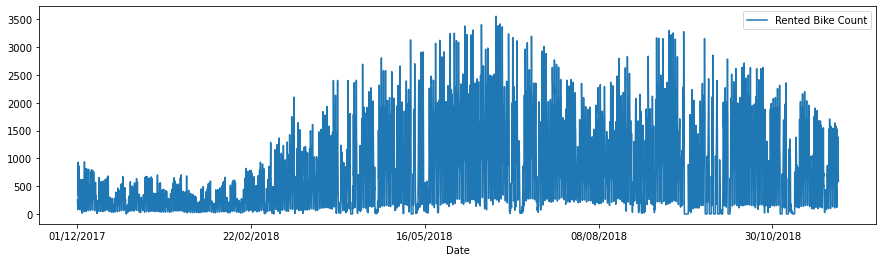

In [47]:
# plotting the bike count against date
df.plot(x='Date', y='Rented Bike Count', figsize=(15,4))
plt.show()

In [48]:
# converting the datetime column and then forming  day, month and year columns
df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
df['month'] =  df['Date'].dt.month
df['day'] =  df['Date'].dt.day


In [49]:
# since we already have columns as day, month and year hence we can remove this  Date column
df = df.drop('Date', axis =1)

In [50]:
# defining all the continous features and plotting against rented_bike_count using lineplot so that relation can be explained
feature_set1 = [ 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
                'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)' ]

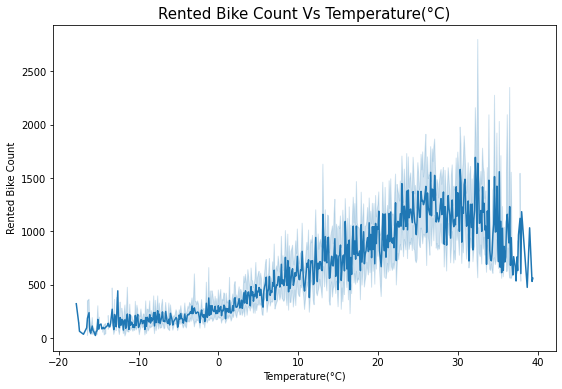

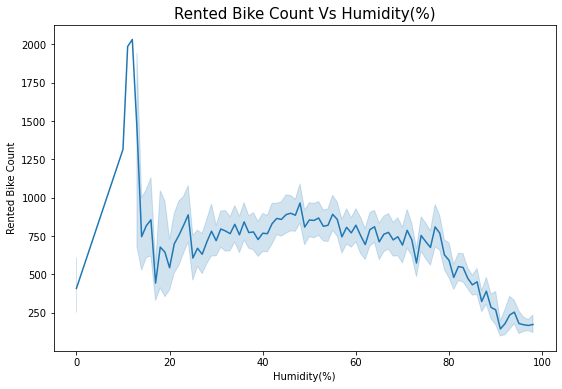

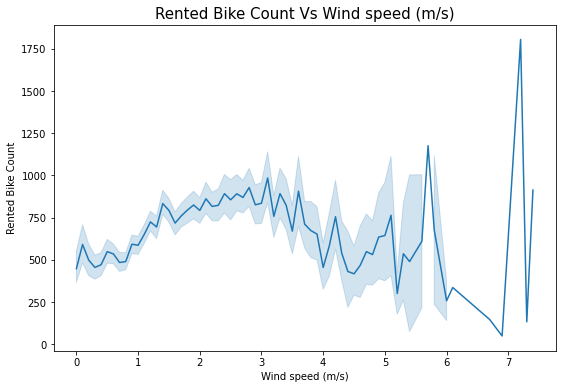

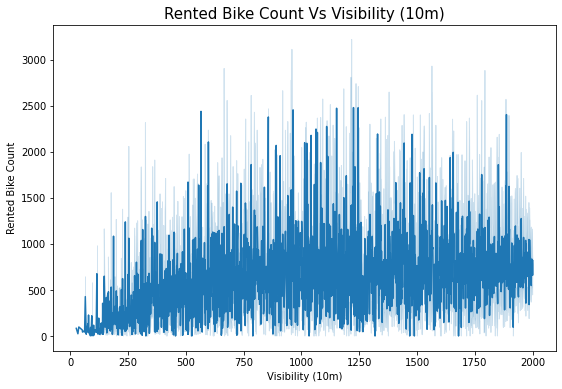

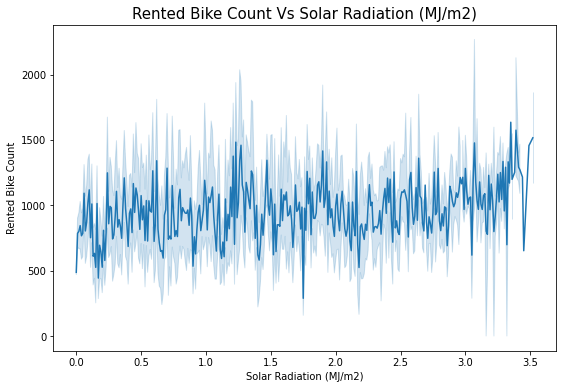

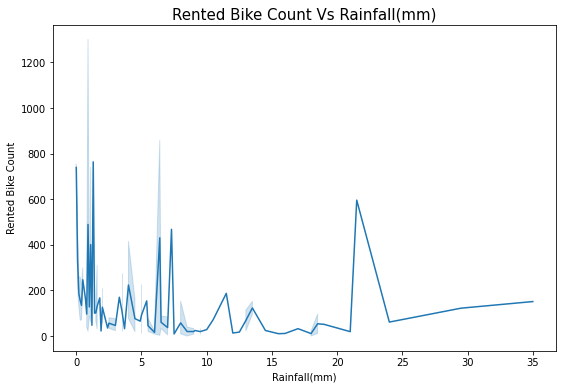

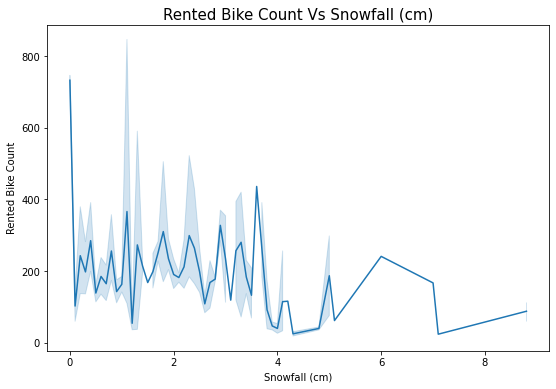

In [51]:
# plotting all the above columns against target column
for col in feature_set1:
  plt.figure(figsize = (9,6))
  sns.lineplot(x= col, y = 'Rented Bike Count', data= df )
  plt.title('Rented Bike Count Vs ' + col, fontsize =15)
  plt.show()

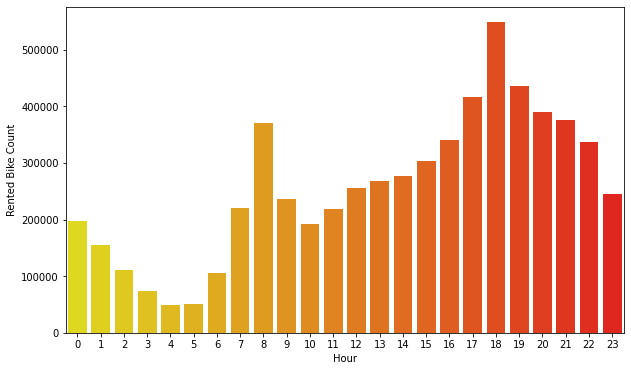

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396
5,5,50765
6,6,104961
7,7,221192
8,8,370731
9,9,235784


In [52]:
# distribution of rented_bike_count against different hours and it's visualization
plt.figure(figsize = (10,6))
hour_dist = df.groupby('Hour')[['Rented Bike Count']].sum().reset_index()
sns.barplot(data =hour_dist ,x= 'Hour', y = 'Rented Bike Count', palette = 'autumn_r')
plt.show()
hour_dist



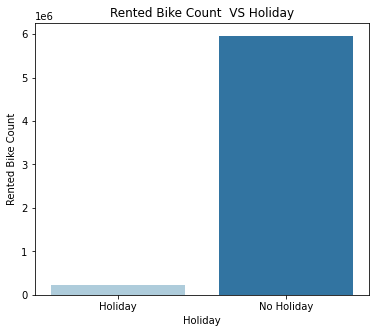

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


In [53]:
# distribution of rented_bike_count against Holiday column and it's visualization
plt.figure(figsize = (6,5))
holyday_dist = df.groupby('Holiday')[['Rented Bike Count']].sum().reset_index()
sns.barplot(data =holyday_dist ,x= 'Holiday', y = 'Rented Bike Count', palette = 'Paired')
plt.title( 'Rented Bike Count  VS ' + 'Holiday' )
plt.show()
holyday_dist

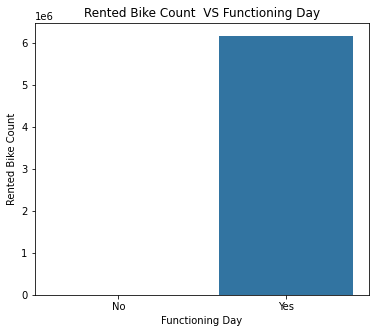

,Functioning Day,Rented Bike Count
0,No,0
1,Yes,6172314


In [54]:
# distribution of rented_bike_count against Functioning Day column and it's visualization
plt.figure(figsize = (6,5))
func_dist = df.groupby('Functioning Day')[['Rented Bike Count']].sum().reset_index()
sns.barplot(data =func_dist ,x= 'Functioning Day', y = 'Rented Bike Count', palette = 'Paired')
plt.title( 'Rented Bike Count  VS ' + 'Functioning Day' )
plt.show()
func_dist

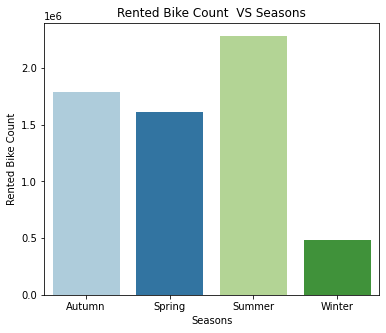

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


In [55]:
# distribution of rented_bike_count against Seasons column and it's visualization
plt.figure(figsize = (6,5))
seasons_dist = df.groupby('Seasons')[['Rented Bike Count']].sum().reset_index()
sns.barplot(data =seasons_dist ,x= 'Seasons', y = 'Rented Bike Count', palette = 'Paired')
plt.title( 'Rented Bike Count  VS ' + 'Seasons' )
plt.show()
seasons_dist

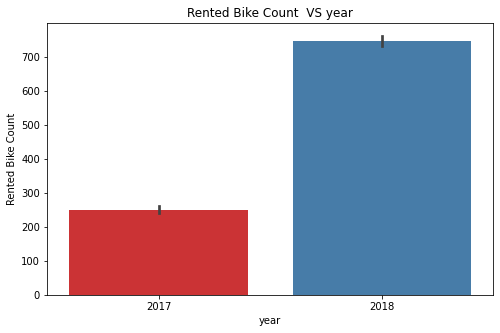

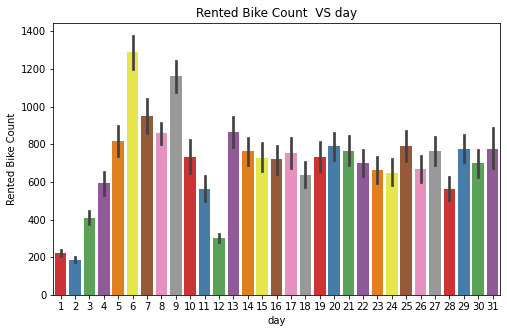

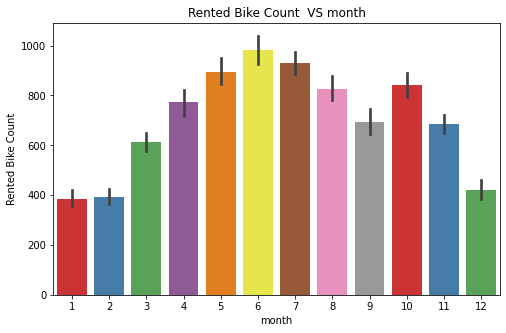

In [56]:
# Plotting rest category features

features_set1  = [ 'year', 'day', 'month' ]
for i in features_set1:
  plt.figure(figsize = (8,5))
  sns.barplot(data = df, x=i, y = 'Rented Bike Count', palette = 'Set1')
  plt.title( 'Rented Bike Count  VS ' + i )
  plt.show()

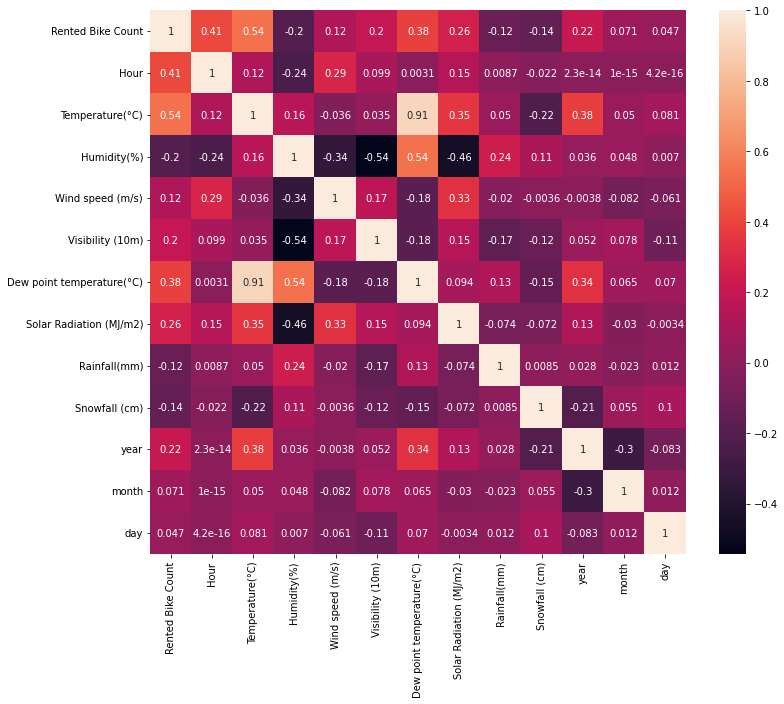

In [57]:
# Plotting heatmap to analyze the correlation between two variables
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [58]:
#Multicollinearity analysis using vif from 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [79]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.456946
1,Temperature(°C),188.757275
2,Humidity(%),187.140788
3,Wind speed (m/s),4.848147
4,Visibility (10m),10.695216
5,Dew point temperature(°C),127.016687
6,Solar Radiation (MJ/m2),2.909493
7,Rainfall(mm),1.103999
8,Snowfall (cm),1.152549
9,year,407.294385


In [60]:
# Removing highly correlated features so that we get best results
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)', 'year']]])

,variables,VIF
0,Hour,3.998419
1,Temperature(°C),3.236167
2,Humidity(%),6.757926
3,Wind speed (m/s),4.621365
4,Visibility (10m),5.455330
5,Solar Radiation (MJ/m2),2.280208
6,Rainfall(mm),1.081555
7,Snowfall (cm),1.136671
8,month,4.603431
9,day,3.849545


## Summary Section 3

in this section various interesting information and hence we can summarise the section as -

1. Bike count increases as temprature increases upto ~33C and then decrease.
2. when the humidity is between 20 and 80 bike count distribution is approx similar and if it goes beyond 80 count goes lower down.
3. Visibility and radiation are direclty affecting the bike count.
4. Rainfall and snowfall are having random distribution with the bike count.
5. more bike counts are on functional and non holiday days which is quite intersting.
6. from day 5 to day 10 of the month bike are high and then it shows uniform distribution.
7. people are using these bikes in evening in a very high extent.
8. rented bike count is less in winter season hence in comparision of other seasons.
9. finally we have removed highly correlated columns using VIF factor from scipy.stats
10. we also have found that bike count is very high in 2018 in comparision of 2017

# Section 4
## Prediction time

from above sections we already have understood that this data is randomly distributed and cannot be be corrected by transformation in order to apply a parametric algorithm hence we will have to use a non-parametric algorithm such as decision tree, random forest or boosting algorithm. here in out case first we will use decison tree which is a semi-eaxplainable model and if don't get good results then we will use Random forest and then XGBoost algorithm. Note that we will only show two algorithm here in this notebook for rest we will check and eliminate if they not performing well.

In [61]:
# converting all categorical variables into dummy variable so that data can be feedable to ML model
bike_data = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day'], prefix=["season", "holiday","fday"])
bike_data = bike_data.drop(['Dew point temperature(°C)', 'year'], axis =1)


In [62]:
# looking at 5 rows of final data
bike_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,day,season_Autumn,season_Spring,season_Summer,season_Winter,holiday_Holiday,holiday_No Holiday,fday_No,fday_Yes
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,12,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,12,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,12,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,12,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,12,0,0,0,1,0,1,0,1


In [63]:
# checking all the features
bike_data.columns


Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'month', 'day', 'season_Autumn',
       'season_Spring', 'season_Summer', 'season_Winter', 'holiday_Holiday',
       'holiday_No Holiday', 'fday_No', 'fday_Yes'],
      dtype='object')

In [64]:
# defining features and target variable
X = bike_data.drop('Rented Bike Count', axis =1)
y = bike_data['Rented Bike Count']

In [65]:
# train test split and checking shape of our data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(6570, 18)
(2190, 18)


In [66]:
# scalling the features
sc = StandardScaler()
X_train =  sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# applying decision tree model 
d_model  = DecisionTreeRegressor()

params = { 'max_depth': [5,7,3,8,9,10,15],'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}


model1 = GridSearchCV(d_model, params)
model1.fit(X_train, y_train)
print("The best fit max_depth value is found out to be :" ,model1.best_params_)

The best fit max_depth value is found out to be : {'criterion': 'friedman_mse', 'max_depth': 10}


In [67]:
# predicting the values using decision tree model
d_pred =  model1.predict(X_test)

In [68]:
# checking mean squared error
MSE = mean_squared_error(y_test, d_pred)
MSE

84511.50894185828

In [69]:
# checking r^2 and adjusted r^2 error using decision tree model
r2 = r2_score(y_test, d_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, d_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.793471882002239
Adjusted R2 :  0.7917595346397517


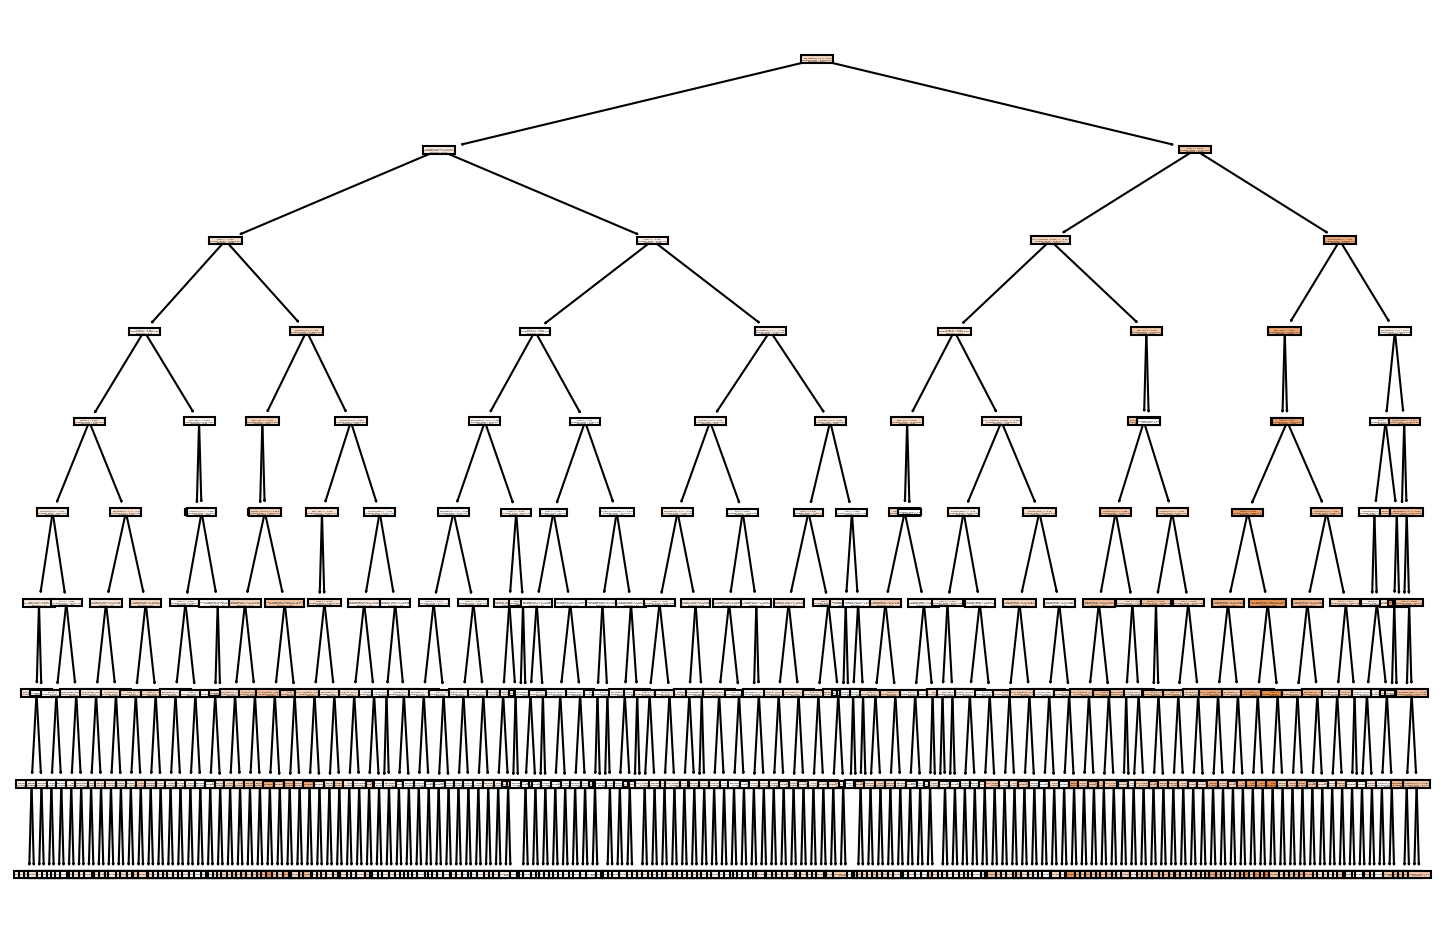

In [70]:
# plotting the decision tree plot using plot_tree 

from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=150)
plot_tree(DecisionTreeRegressor(max_depth = 9).fit(X_train, y_train),filled=True,feature_names=X.columns);

In [71]:
# for better accuracy applying XGBoost regressor 

xg_model =  XGBRegressor(objective ='reg:squarederror',eta =0.05, max_depth = 9, n_estimators= 300, reg_lambda = 1.0, subsample= 0.6)

# params = {'n_estimators' : [70,100,250,300], 'learning_rate': [0.001,0.01,0.05,0.1],
#           'max_depth': [8,9,10], 'subsample': [0.60,0.70], 'reg_lambda' : [0.9,0.8,1.0] }

# xg_model  = GridSearchCV(model_xg, params, cv = 5)

xg_model.fit(X_train , y_train)
xg_pred = xg_model.predict(X_test)
xg_train_pred = xg_model.predict(X_train)


# print(print("The best fit params values are found out to be :" ,xg_model.best_params_))


r2 = r2_score(y_test, xg_pred)
print("R2 on test data :" ,r2)
print("Adjusted R2 on test data : ",1-(1-r2_score(y_test, xg_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))



r2 = r2_score(y_train, xg_train_pred)
print("R2 on train data :" ,r2)
print("Adjusted R2 on train data : ",1-(1-r2_score(y_train, xg_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))


R2 on test data : 0.8876661400961339
Adjusted R2 on test data :  0.8867347676971151
R2 on train data : 0.9994354970815345
Adjusted R2 on train data :  0.9994339460126087


In [72]:
# printing the predicted values so that we can verify that all the values are distinct 
import sys
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)
xg_pred.flatten()

array([1562.0636   ,  755.30914  ,  716.529    , 2104.7522   ,
        537.9886   ,  716.93146  , 1606.5093   ,  640.3424   ,
        989.92883  ,  557.0085   ,   26.36224  ,  332.28052  ,
        278.91714  ,  867.94574  , 1314.2234   , 1041.2524   ,
        471.37466  ,  268.26227  , 1353.3163   ,   34.710194 ,
       1253.051    , 1493.2114   , 1111.1532   ,  155.16895  ,
         63.444763 , 2044.8422   , 2095.15     ,  313.84128  ,
        912.4577   ,  400.3456   ,  767.9385   ,  192.79892  ,
        179.71802  , 1028.7922   ,  503.29483  ,  801.70404  ,
         24.028399 ,  212.25104  ,  304.17444  ,  138.96416  ,
       2519.078    ,  942.3699   ,  485.0467   ,  228.50769  ,
        513.6266   , 1996.2083   ,  175.36945  ,  160.41542  ,
        686.849    ,  673.4131   , 1057.214    ,  240.38022  ,
        144.99829  ,  941.01245  , 1740.4402   ,  902.49164  ,
        845.78546  ,   75.490486 , 1202.3097   , 1457.0648   ,
        263.29663  ,  317.98898  , 1493.2671   ,   59.9

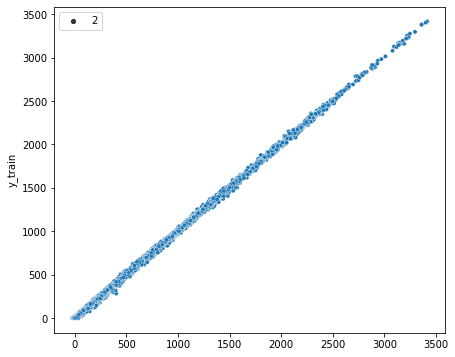

,y_train,xg_train_pred
6565,1507,1519.406616
6566,828,814.920776
6567,999,1009.277344
6568,322,315.505005
6569,1501,1499.960449


In [73]:
#plotting the training data using a scatter plot
train_data = pd.DataFrame({'y_train' : np.array(y_train), 'xg_train_pred': np.array(xg_train_pred)})
plt.figure(figsize = (7,6))
sns.scatterplot(data = train_data, y = 'y_train', x=xg_train_pred, size =2 )
plt.show()
train_data.tail()

Text(0.5, 1.0, 'Actual vs. Predicted Bike Rents')

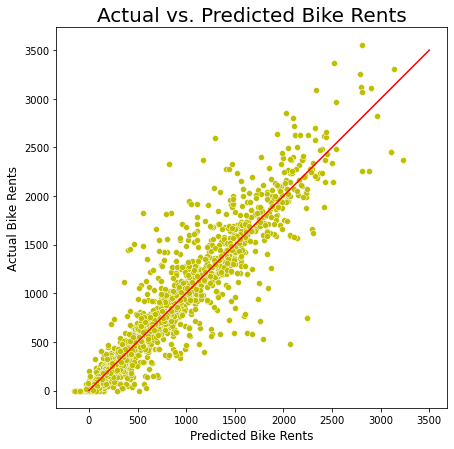

In [74]:
# plotting predictions
plt.figure(figsize=(7,7))

x = np.linspace(0,3500,10)
y = x
sns.scatterplot(xg_pred, y_test, color= 'y')
sns.lineplot(x, y, c='r')
plt.gca().set_aspect('equal')
plt.xlabel('Predicted Bike Rents', size=12)
plt.ylabel('Actual Bike Rents', size=12)
plt.title('Actual vs. Predicted Bike Rents', size=20)
# plt.xlim(0,3500)
# plt.ylim(0,3500)

In [75]:
# getting feature importance and creating a dataframe 
pd.DataFrame(index=X.columns,data=xg_model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

,Feature Importance
fday_No,0.466612
season_Winter,0.125173
Rainfall(mm),0.093018
season_Autumn,0.085748
Hour,0.042657
Temperature(°C),0.041043
Solar Radiation (MJ/m2),0.030273
season_Spring,0.025112
holiday_Holiday,0.024071
Humidity(%),0.018112


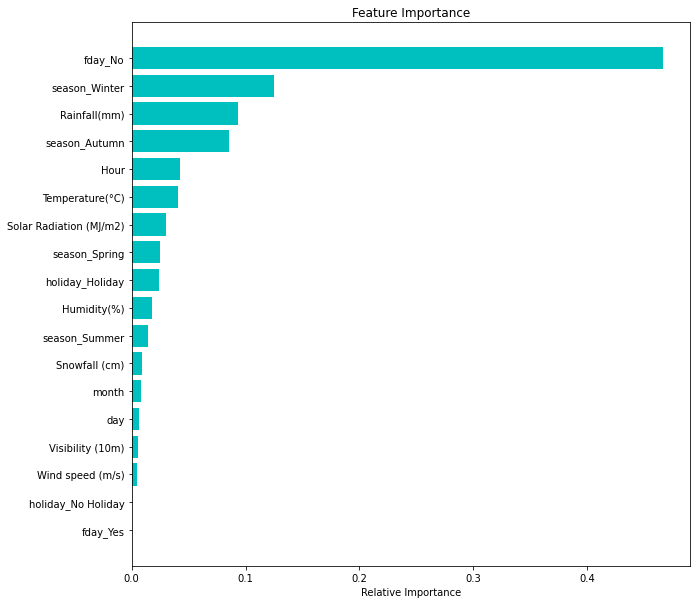

In [76]:
# plotting the feature importance 
features = X.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize  = (10,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='c', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## Additional
we also have tried random forest and get below results. but these are completely additional part as we already have achieved r^2 as 89% using xgboost algorithm

In [77]:
# R_model = RandomForestRegressor(max_depth = 15, n_estimators = 150)


# # params = {'n_estimators': [70,80,100,150,200], 'max_depth': [5,8,12,15]}

# # R_model = GridSearchCV(model2, params, cv = 5)

# R_model.fit(X_train, y_train)

# # print("The best fit max_depth value is found out to be :", R_model.best_params_)

# r_pred = R_model.predict(X_test)

# r2 = r2_score(y_test, r_pred)
# print("R2 on test data :" ,r2)
# print("Adjusted R2 on test data : ",1-(1-r2_score(y_test, r_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

## Section 4 
In this section first we have checked for categorical column and convert them into numerical column. we have noticed that we do not have any column for lebel encoding hence we have applied one hot encoding to all the categorical columns like season, functional day, and holiday. then we have scaled our data although this step could have been skipped as we are not using any distance based algorithm. then keeping in mind the explainability we have used decision tree regresssor and found that this model is not giving us very good results hence we had to choose some blackbox model so we have choosen xgboost algorithm which is giving us 89% accuracy. finally we have plotted the predictions and actual points. Then we looked at feature importance and found that non-functional day is the most important feature of our predictions followed by winter season

## Final Summary
in this section we will summarise everything that we have done so far. 
section 1 : we simply imported our library and loaded our data in google colab and then we have got overview of the data that what features we have are the datatypes and unique values in each feature and finally we have described our data.

Section 2 : we have focused on distributions of each feature in the dataset and found that this data is randomly distributed across different feature dimentions hence we were confirmed that we won't use any parametric regression algorithm. 

Section 3 : in this section we moved to the next step focused on bi-variate distribution specially between target column and other features. we also have removed unwanted features in order to get better prediction results. 

Section 4 : in this section first we have transformed categorical features into numeric features then we used decision tree keeping explainability in mind however the were not very good so we have choosen a black box model to get better predictions. and this model was xgboost regressor which gave us 89% accurate results. then final task was plot the feature importance of the dataset. overall we have perfomed analysis on our data and predicted our target column and these predictions are ready to be presented to the senior management who can decide many strategies 